# **Grupo**

* Bruno Santos - bfss@cesar.school
* Caio Guedes - ccsg@cesar.school

###Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

###Carregar a base de dados

Abaixo iremos carregar a base de dados "Non verbal tourists data DataSet".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv

Obs: iremos considerar a variável de saída: **Tipo/classe do cliente**

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv")

In [ ]:
df.head(10)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0
5,F,31,canada,yes,likes,likes,likes,likes,likes,likes,...,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
6,M,64,canada,yes,indiferent,likes,likes,likes,likes,indiferent,...,10,2,B,dislikes,dislikes,likes,indiferent,dislikes,dislikes,1
7,M,51,argentina,yes,likes,likes,likes,likes,likes,indiferent,...,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
8,F,28,hungary,no,likes,likes,likes,likes,likes,indiferent,...,3,3,C,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
9,M,78,england,yes,likes,likes,likes,likes,likes,likes,...,3,2,A,dislikes,indiferent,likes,dislikes,likes,indiferent,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

In [ ]:
df.describe()

,age,Tense - relaxed,Hostile - friendly,Type of Client
count,73.000000,73.000000,73.000000,73.000000
mean,47.260274,2.232877,2.232877,2.493151
std,15.115323,1.523160,1.467429,1.226142
min,24.000000,1.000000,1.000000,0.000000
25%,36.000000,1.000000,1.000000,2.000000
50%,47.000000,2.000000,2.000000,2.000000
75%,56.000000,3.000000,3.000000,3.000000
max,81.000000,5.000000,6.000000,5.000000


In [ ]:
colunas_valor_interrogacao = df.columns[df.isin(['?']).any()].tolist()

print("Colunas com o valor '?':", colunas_valor_interrogacao)

Colunas com o valor '?': ['GImg3', 'PImg5', 'Authoritative -anarchic ']


In [ ]:
colunas = ['GImg3', 'PImg5', 'Authoritative -anarchic ']

for column in colunas:
    print(f"Valores únicos na coluna '{column}':")
    print(df[column].value_counts(), "\n")

Valores únicos na coluna 'GImg3':
GImg3
likes         41
indiferent    19
dislikes      12
?              1
Name: count, dtype: int64 

Valores únicos na coluna 'PImg5':
PImg5
dislikes      70
?              2
indiferent     1
Name: count, dtype: int64 

Valores únicos na coluna 'Authoritative -anarchic ':
Authoritative -anarchic 
2     13
9      9
4      9
3      8
1      8
10     7
8      5
7      5
6      5
5      3
?      1
Name: count, dtype: int64 



In [ ]:
print(f"Valores únicos na coluna Type of Client: ")
print(df['Type of Client'].value_counts(), "\n")

Valores únicos na coluna Type of Client: 
Type of Client
2    36
4    14
3    10
0     5
1     4
5     4
Name: count, dtype: int64 



###Tratamento dos dados

Abaixo trate os valores "?" presente em algumas colunas. Use a estratégia que for mais confortável.

Dica: Use a função `replace`.

In [ ]:
# Tem ? em 3 colunas: 'GImg3', 'PImg5', 'Authoritative -anarchic '\
# Trocamos nas colunas GImg3 e PImg5 pelas modas, já que são textos
# Na 3a coluna colocamos a mediana, que é 4, já que são só inteiros

In [ ]:
# Substituindo "?" por valores apropriados em cada coluna
df['GImg3'].replace("?", "likes", inplace=True)
df['PImg5'].replace("?", "dislikes", inplace=True)
df['Authoritative -anarchic '].replace("?", 4, inplace=True)

<ipython-input-84-38c0351ac184>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GImg3'].replace("?", "likes", inplace=True)
<ipython-input-84-38c0351ac184>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
# Verificando se os valores foram substituídos corretamente
print(df['GImg3'].value_counts(), "\n")
print(df['PImg5'].value_counts(), "\n")
print(df['Authoritative -anarchic '].value_counts())

GImg3
likes         42
indiferent    19
dislikes      12
Name: count, dtype: int64 

PImg5
dislikes      72
indiferent     1
Name: count, dtype: int64 

Authoritative -anarchic 
2     13
9      9
4      9
3      8
1      8
10     7
8      5
7      5
6      5
5      3
4      1
Name: count, dtype: int64


A seguir substitua os valores categóricos (
Male, Female, Indifferent, likes, dislikes) por valores numéricos definidos por você.

Dica: leia a [página](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) da documentação da biblioteca Pandas.


In [ ]:
# Verificando antes
print(df[['returning', 'sex', 'GImg1', 'GImg2', 'GImg3', 'PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5']].head())

  returning sex       GImg1       GImg2       GImg3  PImg1  PImg2       PImg3  \
0        no   F       likes  indiferent  indiferent  likes  likes  indiferent   
1        no   M       likes  indiferent  indiferent  likes  likes       likes   
2        no   F  indiferent  indiferent  indiferent  likes  likes  indiferent   
3        no   M       likes    dislikes    dislikes  likes  likes  indiferent   
4        no   M  indiferent  indiferent  indiferent  likes  likes  indiferent   

        PImg4     PImg5  
0  indiferent  dislikes  
1       likes  dislikes  
2       likes  dislikes  
3  indiferent  dislikes  
4       likes  dislikes  


In [ ]:
# Verificando antes
print(df[['TAudio1', 'TAudio2', 'TAudio3', 'QAudio1', 'QAudio2', 'QAudio3', 'Proxemics']].head())

  TAudio1   TAudio2   TAudio3     QAudio1     QAudio2     QAudio3 Proxemics
0       C  dislikes  dislikes  indiferent    dislikes    dislikes  dislikes
1       B  dislikes  dislikes       likes       likes    dislikes  dislikes
2       C  dislikes  dislikes       likes    dislikes    dislikes  dislikes
3       C  dislikes  dislikes       likes    dislikes  indiferent  dislikes
4       C  dislikes  dislikes       likes  indiferent    dislikes  dislikes


In [ ]:
# Mapeamento
# Returning no: 0
# Returning yes: 1

# Male: 0
# Female: 1

# Dislike = 0
# Indiferente = 1
# Likes = 2

# TAudio
# A: 0
# B: 1
# C: 2
# D: 3

In [ ]:
# Mapeamento dos valores categóricos para numéricos
returning_mapping = {'no': 0, 'yes': 1}
sex_mapping = {'M': 0, 'F': 1}
img_mapping = {'dislikes': 0, 'indiferent': 1, 'likes': 2}
taudio_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

# Aplicando as substituições
df['returning'] = df['returning'].map(returning_mapping)
df['sex'] = df['sex'].map(sex_mapping)
df['GImg1'] = df['GImg1'].map(img_mapping)
df['GImg2'] = df['GImg2'].map(img_mapping)
df['GImg3'] = df['GImg3'].map(img_mapping)
df['PImg1'] = df['PImg1'].map(img_mapping)
df['PImg2'] = df['PImg2'].map(img_mapping)
df['PImg3'] = df['PImg3'].map(img_mapping)
df['PImg4'] = df['PImg4'].map(img_mapping)
df['PImg5'] = df['PImg5'].map(img_mapping)
df['TAudio1'] = df['TAudio1'].map(taudio_mapping)
df['TAudio2'] = df['TAudio2'].map(img_mapping)
df['TAudio3'] = df['TAudio3'].map(img_mapping)
df['QAudio1'] = df['QAudio1'].map(img_mapping)
df['QAudio2'] = df['QAudio2'].map(img_mapping)
df['QAudio3'] = df['QAudio3'].map(img_mapping)
df['Proxemics'] = df['Proxemics'].map(img_mapping)

In [ ]:
# Verificando os resultados
print(df[['returning', 'sex', 'GImg1', 'GImg2', 'GImg3', 'PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5']].head())

   returning  sex  GImg1  GImg2  GImg3  PImg1  PImg2  PImg3  PImg4  PImg5
0          0    1      2      1      1      2      2      1      1      0
1          0    0      2      1      1      2      2      2      2      0
2          0    1      1      1      1      2      2      1      2      0
3          0    0      2      0      0      2      2      1      1      0
4          0    0      1      1      1      2      2      1      2      0


In [ ]:
# Verificando os resultados
print(df[['TAudio1', 'TAudio2', 'TAudio3', 'QAudio1', 'QAudio2', 'QAudio3', 'Proxemics']].head())

   TAudio1  TAudio2  TAudio3  QAudio1  QAudio2  QAudio3  Proxemics
0        2        0        0        1        0        0          0
1        1        0        0        2        2        0          0
2        2        0        0        2        0        0          0
3        2        0        0        2        0        1          0
4        2        0        0        2        1        0          0


Visualize os dados usando das funções que achar necessarias e caso necessario remova as colunas que não agreguem informação. Pode utilizar a matriz de correlação para selecionar ou remover features. Justifique a remoção de colunas caso ocoram.

In [ ]:
df['Authoritative -anarchic '] = df['Authoritative -anarchic '].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     int64 
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     int64 
 4   GImg1                     73 non-null     int64 
 5   GImg2                     73 non-null     int64 
 6   GImg3                     73 non-null     int64 
 7   PImg1                     73 non-null     int64 
 8   PImg2                     73 non-null     int64 
 9   PImg3                     73 non-null     int64 
 10  PImg4                     73 non-null     int64 
 11  PImg5                     73 non-null     int64 
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     int64 
 14  Hostile - friendly        73

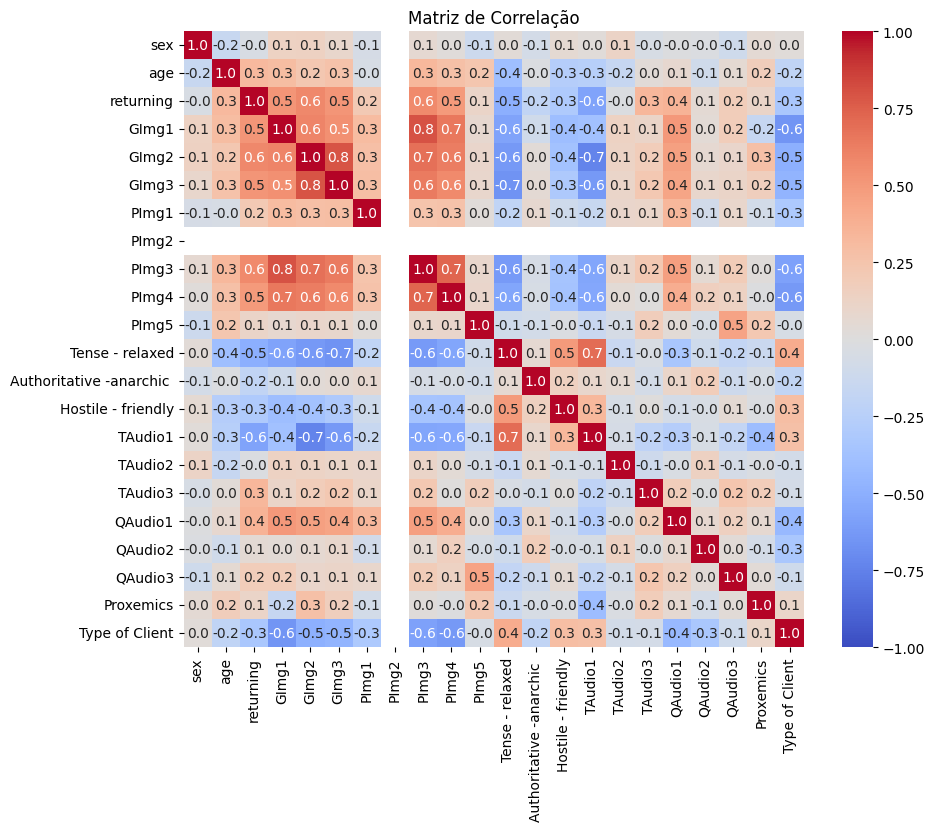

In [ ]:
# Heatmap
df_numerico = df.drop(columns=['country']).copy()
corr_matrix = df_numerico.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()

Com isso, percebemos que PImg2 possui o mesmo valor sempre: 'likes', podendo ser deletada sem impactos.

Faça as demais transformações que julgar necessárias na base de dados.

In [ ]:
# [ALTERE AQUI]

###Separação treino/teste

Separe os valores e os rótulos da base de dados.

In [ ]:
# [ALTERE AQUI]

Separe a base de dados em teste e treino. Use a divisão 75% para treino 25% para teste

In [ ]:
# [ALTERE AQUI]

### k-NN

Instancie e treine a k-NN com diversos valores para os vizinhos. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [ ]:
# [ALTERE AQUI]

Plote a matriz de confusão.

In [ ]:
# [ALTERE AQUI]

Exiba as métricas do classification report.

In [ ]:
# [ALTERE AQUI]

Otimizar o valor de K
- Ache o melhor valor de k para o algoritmo k-NN. Utilize o intervalo de 1 a 30.

In [ ]:
# [ALTERE AQUI]

Exiba a média dos resultados obtidos do experimento anterior

In [ ]:
# [ALTERE AQUI]

Treine um modelo de k-NN com o melhor valor de k obtido e:

1. Plot a matriz de confusão
2. Exiba as métricas do Classification Report para o modelo k-NN


In [ ]:
# [ALTERE AQUI]

In [ ]:
# [ALTERE AQUI]

###Random Forest

Instancie e treine a Random Forest com os parâmetros default do algoritmo. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [ ]:
# [ALTERE AQUI]

Exiba as métricas do Classification Report para o modelo Random Forest

In [ ]:
# [ALTERE AQUI]

Plote a matriz de confusão.

In [ ]:
# [ALTERE AQUI]

## Grid Search

Faça um grid search dos parâmetros da **Random Forest**:
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
4. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

Links de referência:
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
2. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
# [ALTERE AQUI]

Exiba a média dos resultados obtidos do experimento anterior

In [ ]:
# [ALTERE AQUI]

Treine um modelo de Random Forest com os melhores valores dos parâmetros obtidos:

1. Exiba as métricas do Classification Report
2. Plot a matriz de confusão

In [ ]:
# [ALTERE AQUI]

In [ ]:
# [ALTERE AQUI]

## Conclusão